<a href="https://colab.research.google.com/github/luciaemiliaeu/Nootebooks-Alura/blob/main/Deep_learning_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow 
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

#Base de dados Fashion_mnist

Carregando

In [ ]:
dataset = keras.datasets.fashion_mnist
(x_treino, y_treino), (x_teste, y_teste) = dataset.load_data()

Descrição da base

In [ ]:
print('Tamanho do treino: ', x_treino.shape)
print('Tamanho do teste: ', x_teste.shape)
print('Categorias: ', np.unique(y_treino))
print('Tipo de dados: ', type(x_teste))

Tamanho do treino:  (60000, 28, 28)
Tamanho do teste:  (10000, 28, 28)
Categorias:  [0 1 2 3 4 5 6 7 8 9]
Tipo de dados:  <class 'numpy.ndarray'>


Amostra

In [ ]:
index_amostras =  [list(y_treino).index(x) for x in set(y_treino)]
amostras = x_teste[index_amostras]

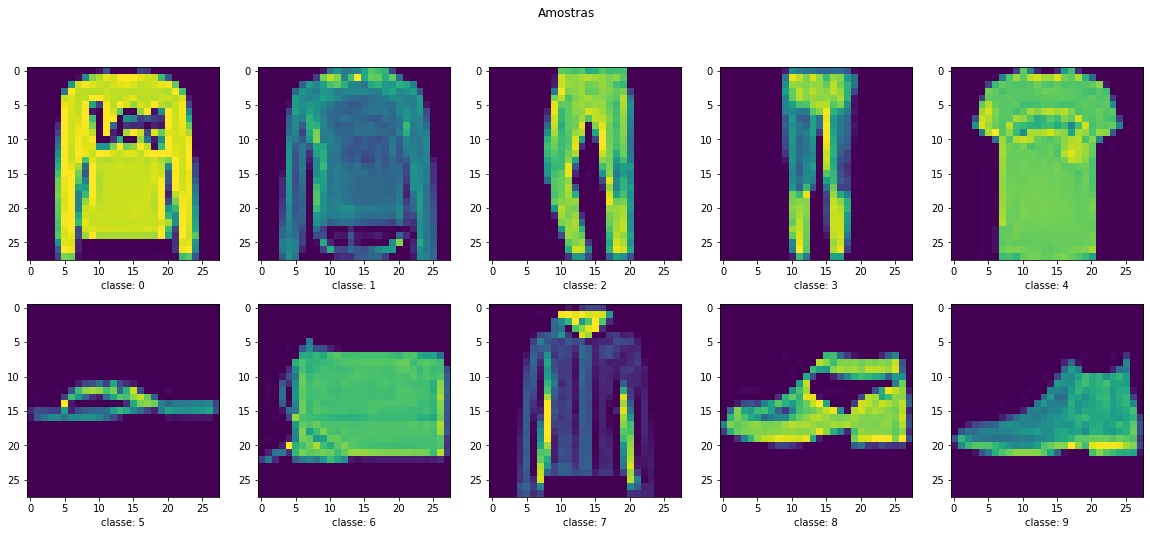

In [ ]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(2,5)

amostra1 = plt.subplot(gspec[0,0])
amostra1.imshow(amostras[0])
amostra1.set_xlabel('classe: 0')

amostra2 = plt.subplot(gspec[0,1])
amostra2.imshow(amostras[1])
amostra2.set_xlabel('classe: 1')

amostra3 = plt.subplot(gspec[0,2])
amostra3.imshow(amostras[2])
amostra3.set_xlabel('classe: 2')

amostra4 = plt.subplot(gspec[0,3])
amostra4.imshow(amostras[3])
amostra4.set_xlabel('classe: 3')

amostra5 = plt.subplot(gspec[0,4])
amostra5.imshow(amostras[4])
amostra5.set_xlabel('classe: 4')

amostra6 = plt.subplot(gspec[1,0])
amostra6.imshow(amostras[5])
amostra6.set_xlabel('classe: 5')

amostra7 = plt.subplot(gspec[1,1])
amostra7.imshow(amostras[6])
amostra7.set_xlabel('classe: 6')

amostra8 = plt.subplot(gspec[1,2])
amostra8.imshow(amostras[7])
amostra8.set_xlabel('classe: 7')

amostra9 = plt.subplot(gspec[1,3])
amostra9.imshow(amostras[8])
amostra9.set_xlabel('classe: 8')

amostra10 = plt.subplot(gspec[1,4])
amostra10.imshow(amostras[9])
amostra10.set_xlabel('classe: 9')

fig.suptitle('Amostras')
plt.show()

In [ ]:
classes = ['Camisa', 'Calça', 'Pullover', 'Vestido', 'Casaco',
           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

Normalização

In [ ]:
x_treino = x_treino/float(255)
x_teste = x_teste/float(255)

# Modelo

##Instanciação

In [ ]:
modelo = keras.Sequential()

modelo.add(keras.layers.Flatten(input_shape=(28, 28)))
modelo.add(keras.layers.Dense(units = 256, activation=tensorflow.nn.relu))
modelo.add(keras.layers.Dropout(rate=0.2))
modelo.add(keras.layers.Dense(units=10, activation=tensorflow.nn.softmax))

modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

##Treinamento

In [ ]:
ajuste = modelo.fit(x_treino, y_treino, epochs= 5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5360 - accuracy: 0.8093 - val_loss: 0.4092 - val_accuracy: 0.8503
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4007 - accuracy: 0.8554 - val_loss: 0.3747 - val_accuracy: 0.8673
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3653 - accuracy: 0.8660 - val_loss: 0.3620 - val_accuracy: 0.8655
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3440 - accuracy: 0.8734 - val_loss: 0.3614 - val_accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3264 - accuracy: 0.8802 - val_loss: 0.3373 - val_accuracy: 0.8787


In [ ]:
ajuste.history

{'accuracy': [0.8092708587646484,
  0.8553958535194397,
  0.8659583330154419,
  0.8733749985694885,
  0.8801666498184204],
 'loss': [0.5360488891601562,
  0.4007260203361511,
  0.36533552408218384,
  0.3439926207065582,
  0.32636570930480957],
 'val_accuracy': [0.8502500057220459,
  0.8672500252723694,
  0.8654999732971191,
  0.8714166879653931,
  0.8786666393280029],
 'val_loss': [0.4092254340648651,
  0.37466734647750854,
  0.36200857162475586,
  0.36140021681785583,
  0.33731845021247864]}

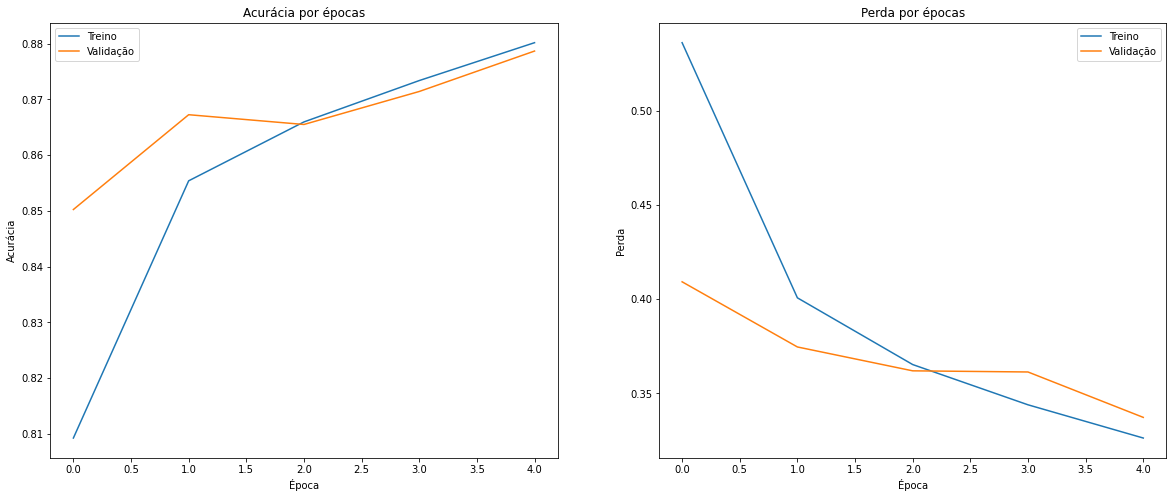

In [ ]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(1,2)

plt_acuracia = plt.subplot(gspec[0,0])
plt_acuracia.set_title('Acurácia por épocas')
plt_acuracia.plot(ajuste.history['accuracy'])
plt_acuracia.plot(ajuste.history['val_accuracy'])
plt_acuracia.set_xlabel('Época')
plt_acuracia.set_ylabel('Acurácia')
plt_acuracia.legend(['Treino', 'Validação'])

plt_perda = plt.subplot(gspec[0,1])
plt_perda.set_title('Perda por épocas')
plt_perda.plot(ajuste.history['loss'])
plt_perda.plot(ajuste.history['val_loss'])
plt_perda.set_xlabel('Época')
plt_perda.set_ylabel('Perda')
plt_perda.legend(['Treino', 'Validação'])
plt.show()

##Teste

In [ ]:
testes = modelo.predict(x_teste)

In [ ]:
y_predict = np.array([np.argmax(x) for x in testes])

In [ ]:
perda, acuracia = modelo.evaluate(x_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8716


In [ ]:
print('Acurácia: ', acuracia)
print('Perda: ', perda)

Acurácia:  0.8715999722480774
Perda:  0.3623339533805847


#Pesos e Vieses

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Entendendo o modelo: 


1.    Na camada flatten: 
> - 784 neurônios (mapeamento da entrada 28x28)
> - nenhum parâmetro ajustável: essa camada faz apenas o achatamento das imagens de entrada

2.   Na primeira camada densa:
>- 256 neurônios
>- 200.960 parâmetros ajustáveis: (784 entradas + 1 bias) * 256 pesos 

3. Na camada de Dropout: 
>- 256 neurônios 
>- nenhum parâmetro ajustável

4. Na camada de saída: 
>- 10 neurônios (um para cada classe) 
>- 2570 parâmetros ajustáveis: (256 entradas + 1 bias) x 10 pesos










In [ ]:
camadas = modelo.layers
print('Parâmetros na camada de entrada: ', camadas[0].get_weights())
print('Parâmetros na camada densa: ', [x.shape for x in camadas[1].get_weights()])
print('Parâmetros na camada de dropout: ', camadas[2].get_weights())
print('Parâmetros na camada saída: ', [x.shape for x in camadas[3].get_weights()])

Parâmetros na camada de entrada:  []
Parâmetros na camada densa:  [(784, 256), (256,)]
Parâmetros na camada de dropout:  []
Parâmetros na camada saída:  [(256, 10), (10,)]


##Teste 1: inicializando com pesos zero

Zerar os pesos iniciais (ou setar valores iguais) torna a rede simétrica.

In [ ]:
pesos_zero = np.zeros(camadas[1].get_weights()[0].shape)

In [ ]:
modelo.layers[1].set_weights(
    [pesos_zero, camadas[1].get_weights()[1]]
)

In [ ]:
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])
ajuste = modelo.fit(x_treino, y_treino, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5411 - accuracy: 0.8065 - val_loss: 0.4223 - val_accuracy: 0.8467
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4093 - accuracy: 0.8506 - val_loss: 0.3865 - val_accuracy: 0.8628
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3756 - accuracy: 0.8611 - val_loss: 0.3983 - val_accuracy: 0.8472
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3518 - accuracy: 0.8686 - val_loss: 0.3532 - val_accuracy: 0.8728
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3345 - accuracy: 0.8773 - val_loss: 0.3474 - val_accuracy: 0.8739


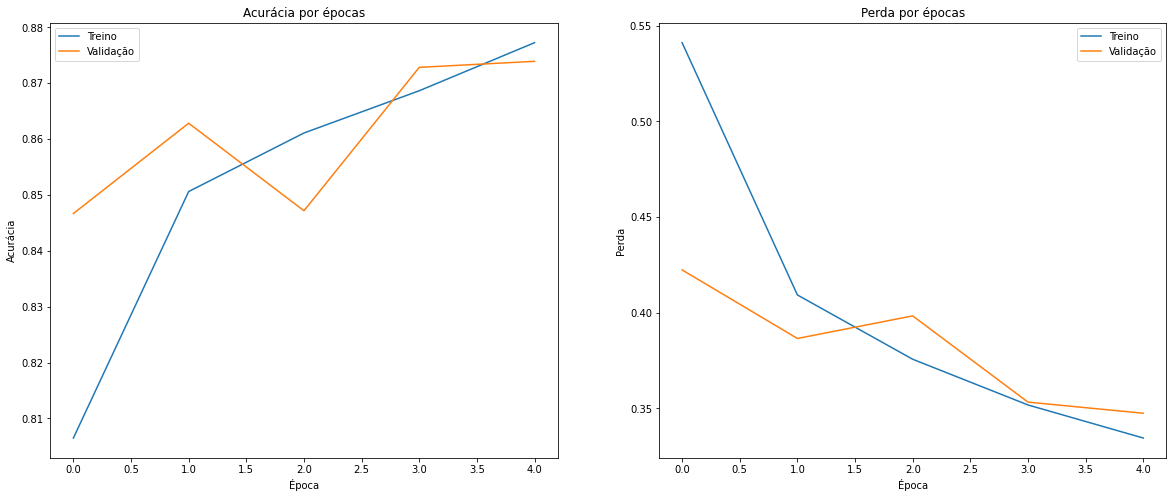

In [ ]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(1,2)

plt_acuracia = plt.subplot(gspec[0,0])
plt_acuracia.set_title('Acurácia por épocas')
plt_acuracia.plot(ajuste.history['accuracy'])
plt_acuracia.plot(ajuste.history['val_accuracy'])
plt_acuracia.set_xlabel('Época')
plt_acuracia.set_ylabel('Acurácia')
plt_acuracia.legend(['Treino', 'Validação'])

plt_perda = plt.subplot(gspec[0,1])
plt_perda.set_title('Perda por épocas')
plt_perda.plot(ajuste.history['loss'])
plt_perda.plot(ajuste.history['val_loss'])
plt_perda.set_xlabel('Época')
plt_perda.set_ylabel('Perda')
plt_perda.legend(['Treino', 'Validação'])
plt.show()

##Teste 2: inicializando com pesos aleatórios

In [ ]:
pesos_random = np.random.rand(camadas[1].get_weights()[0].shape[0], 
                              camadas[1].get_weights()[0].shape[1])

In [ ]:
modelo.layers[1].set_weights(
    [pesos_random, camadas[1].get_weights()[1]]
)

In [ ]:
modelo.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
               metrics = ['accuracy'])
ajuste = modelo.fit(x_treino, y_treino, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 123.0180 - accuracy: 0.4080 - val_loss: 15.9994 - val_accuracy: 0.7280
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 32.0284 - accuracy: 0.6293 - val_loss: 13.4227 - val_accuracy: 0.7258
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 15.3183 - accuracy: 0.6895 - val_loss: 7.4901 - val_accuracy: 0.7731
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 7.6810 - accuracy: 0.7232 - val_loss: 3.6397 - val_accuracy: 0.8025
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 4.1976 - accuracy: 0.7466 - val_loss: 2.5750 - val_accuracy: 0.7853


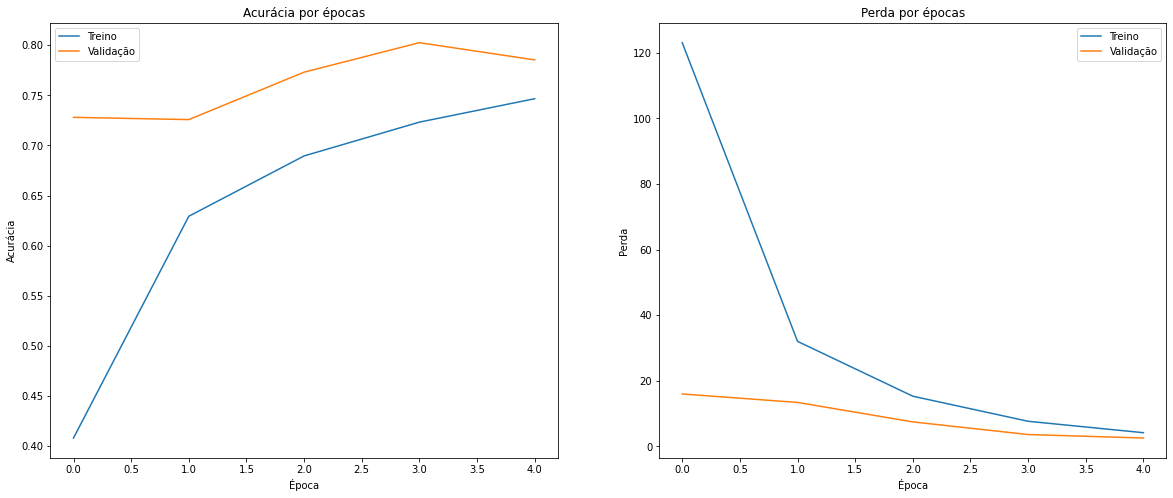

In [ ]:
fig = plt.figure(figsize=(20,8))
gspec = gridspec.GridSpec(1,2)

plt_acuracia = plt.subplot(gspec[0,0])
plt_acuracia.set_title('Acurácia por épocas')
plt_acuracia.plot(ajuste.history['accuracy'])
plt_acuracia.plot(ajuste.history['val_accuracy'])
plt_acuracia.set_xlabel('Época')
plt_acuracia.set_ylabel('Acurácia')
plt_acuracia.legend(['Treino', 'Validação'])

plt_perda = plt.subplot(gspec[0,1])
plt_perda.set_title('Perda por épocas')
plt_perda.plot(ajuste.history['loss'])
plt_perda.plot(ajuste.history['val_loss'])
plt_perda.set_xlabel('Época')
plt_perda.set_ylabel('Perda')
plt_perda.legend(['Treino', 'Validação'])
plt.show()

##GlorotUnform
Por default o Keras usa o inicializador gorotUniform para os pesos. 
Esse inicializador usa uma distribuição uniforme para inicializar os pesos, garantindo que eles não sejam nem muito grandes a ponto de sumirem e nem muito pequenos a ponto de explodirem. 


##Teste 3: inicializando com bias zerado
- A inicialização dos viezes já é zero por padrão no keras.

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

#Entendento a Rede

## RELU

Otput
> - output = activation(dot(inpt, kernel) + bias)
> - atcivation: RELU

Quanto mais variado o bias, mais as saídas ficam distantes. 
>Se o bias aumentas -> o domínio de x aumenta

Se o bias for grande demais, a rede não consegue aprender, as saídas para cada amostra ficam muito distantes.

Se o bias for pequeno demais, a rede vicia, as amostras vão apresentas sempre a mesma saída.





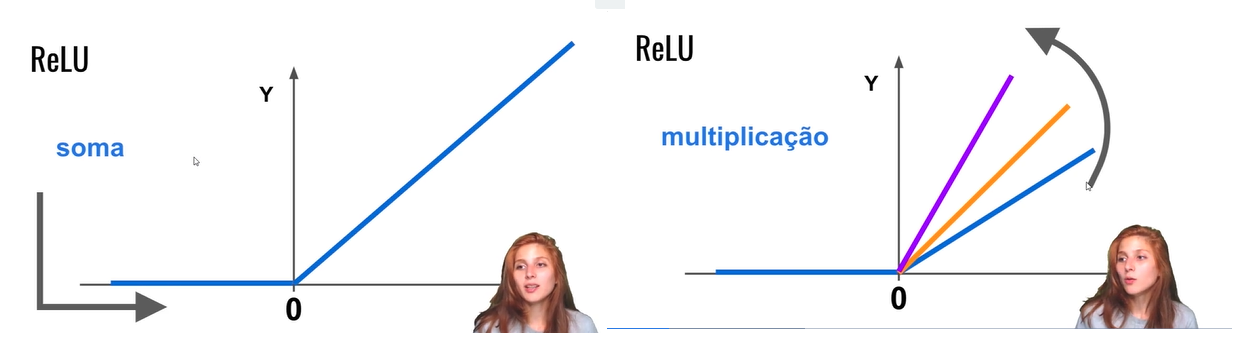

##Gradiente Descendente

O ajuste é feito para encontrar o ponto de mínimo da função de perda. 

Entre um peso e outro o ajuste é feito de acordo com o *momentum* um valor que define quão sensível será o ajuste. Se o momentum for alto, os pesos podem variar rapidamente e ziguezaguear em torno do ponto ótimo. Se fo muito baixo, a descida é lenta e o treinamento pode demorar demais.

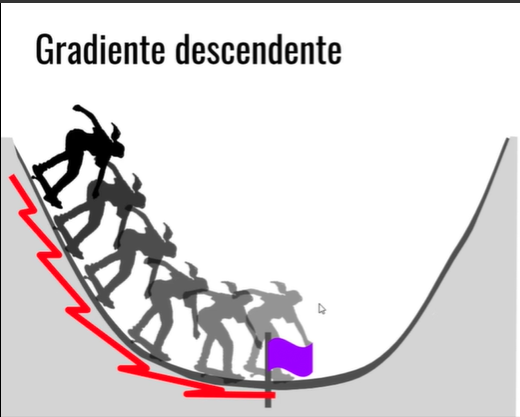

##Otimizador Adam 

Adaptive moment stimation

O Adam usa o gradiente descendente estocástico (aquele que seleciona pontos aleatórios para inicialização quando atualiza os pesos, ao invés de atualizar apenas no fim da época) e o momentum para fazer o ajuste do bias. 

##Tuning de hiperparâmetros
*bach_size* : diminuir o bach_size acelera o treinamento e melhora a aprendizagem (passar mais vezes por menos exemplos ajusta mais precisamente os pesos).

*lr*: taxa de aprendizagem 

##Checkpoint do modelo

Os callbacks podem ser usados para monitorar o desepenho do modelo.
Um checkpoint salva o modelo de acordo com o callback definido.

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'), 
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', 
                                             monitor='val_loss',
                                             save_best_only=True)]

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
ajuste = modelo.fit(x_treino, y_treino,
                    batch_size= 480, epochs= 5,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/5
100/100 [==============================] - 1s 15ms/step - loss: 2.4768 - accuracy: 0.7836 - val_loss: 2.0008 - val_accuracy: 0.8217
Epoch 2/5
100/100 [==============================] - 1s 13ms/step - loss: 1.9709 - accuracy: 0.7917 - val_loss: 1.6041 - val_accuracy: 0.8233
Epoch 3/5
100/100 [==============================] - 1s 13ms/step - loss: 1.7062 - accuracy: 0.7972 - val_loss: 1.4399 - val_accuracy: 0.8281
Epoch 4/5
100/100 [==============================] - 1s 13ms/step - loss: 1.4777 - accuracy: 0.8018 - val_loss: 1.3817 - val_accuracy: 0.7987
Epoch 5/5
100/100 [==============================] - 1s 13ms/step - loss: 1.2932 - accuracy: 0.8106 - val_loss: 1.2252 - val_accuracy: 0.8152


# Salvando e recuperando modelos

In [ ]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [ ]:
modelo_salvo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
